# Lesson: more analysis and plotting tools 

Last week you read and analyzed a CSV file with the `pandas` library. The purpose of todays lesson is to introduce you to *most* of the tools that you will need for your projects.

This is quite a dense lesson. Please do it entirely and quietly in order to remember the principles for later. You can always come back to these examples when you'll need them. There are three sections:
- More about python syntax
- More about pandas
- More about plotting

## More about python syntax

### Python objects

In python, *all* variables are also "things". In the programming jargon, these "things" are called *objects*. Without going into details that you won't need for this lecture, objects have so-called "attributes" and "methods". `Attributes` are information stored about the object, `methods` are similar to functions, but they are applied *to* or *from* the object.

For example, even simple integers are also "things with attributes":

In [2]:
# Let's define an interger
a = 1
# Get its attributes
print('The real part of a is', a.real)
print('The imaginary part of a is', a.imag)

The real part of a is 1
The imaginary part of a is 0


Attributes are read with a `dot`. They are like variables:

In [3]:
ra = a.real
ra

1

Importantly, objects can also have functions that apply to them. For example, `strings` have a function called `split()`:

In [4]:
s = 'This:is:a:stupid:example'
s_splitted = s.split(':')
print(s_splitted)

['This', 'is', 'a', 'stupid', 'example']


The difference with attributes is that the function is called with parentheses, and sometimes they require arguments (the ':' in this case). Strings also have the `join()` method by the way:

In [5]:
' '.join(s_splitted)

'This is a stupid example'

It is not necessary to know the details about object oriented programming to use python (in fact, most of the time you don't need to use these concepts yourselves). But it **is** important to know that you can have access to attributes and methods on almost *everything* in python. 

You can ask Fabien for more tricky examples if you are interested.

### Getting help about python variables and functions

Remember that you can always ask for help about functions:

In [6]:
import pandas as pd
pd.date_range?

Also, the ocumentation pages of the various libraries are very useful. This semester, we are going to rely mostly on three components:
- [numpy](http://docs.scipy.org/doc/numpy/reference/): this is the base on which any scientific python project is built. 
- [matplotlib](http://matplotlib.org/index.html): plotting tools
- [pandas](http://pandas.pydata.org/pandas-docs/version/0.18.0/): working with time series data

It's always useful to have their documentation webpage open on your browser for easy reference.

## More about pandas

We are going to learn about some of the most basic tools offered by ``pandas``.

In [7]:
import pandas as pd  # pd is the short name for pandas. It's good to stick to it. 
# While we are at it, let's import some other things we might need later
# this tells the notebook to draw the plots below the cells, and not in a new window:
%matplotlib inline 
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
# Below I set a gobal option: I would like to reduce the number of rows that pandas is printing:
pd.options.display.max_rows = 14

In [8]:
# We are now using pandas to read the data out of the same csv file as last time
# The first argument to the function is a path to a file, the other arguments
# are called "keywords". They tell to pandas to do certain things
df = pd.read_csv('data_Zhadang_Ex1.csv', index_col=0, parse_dates=True)

**E: what are the two keywords of the function doing? Have a quick look at the documentation of `pandas.read_csv()` (either online or by using `?`). Why do you think that `read_csv` has so many keywords available?**

In [9]:
# your answer here

The output of read_csv is a DataFrame object. A DataFrame has columns and rows and, importantly, it has an index. In our case, it is the time:


In [10]:
df.index

DatetimeIndex(['2010-10-02 00:00:00', '2010-10-02 01:00:00',
               '2010-10-02 02:00:00', '2010-10-02 03:00:00',
               '2010-10-02 04:00:00', '2010-10-02 05:00:00',
               '2010-10-02 06:00:00', '2010-10-02 07:00:00',
               '2010-10-02 08:00:00', '2010-10-02 09:00:00',
               ...
               '2011-09-30 14:00:00', '2011-09-30 15:00:00',
               '2011-09-30 16:00:00', '2011-09-30 17:00:00',
               '2011-09-30 18:00:00', '2011-09-30 19:00:00',
               '2011-09-30 20:00:00', '2011-09-30 21:00:00',
               '2011-09-30 22:00:00', '2011-09-30 23:00:00'],
              dtype='datetime64[ns]', length=8736, freq=None)

For the excercices below it is enough to select a shorter time period, let's say one day:

In [11]:
df = df.loc['2010-10-02']

If I want to quickly know the number of elements of a dataframe, I can use the `len()` function:

In [12]:
len(df)

24

### Columns

Columns can be accessed in two ways. Like this:

In [13]:
df

,TEMP_2M
2010-10-02 00:00:00,-2.887
2010-10-02 01:00:00,-3.223
2010-10-02 02:00:00,-3.912
2010-10-02 03:00:00,-4.137
2010-10-02 04:00:00,-4.241
2010-10-02 05:00:00,-4.019
2010-10-02 06:00:00,-4.500
...,...
2010-10-02 17:00:00,-0.128
2010-10-02 18:00:00,-1.150


In [14]:
t2m = df['TEMP_2M']
t2m

2010-10-02 00:00:00   -2.887
2010-10-02 01:00:00   -3.223
2010-10-02 02:00:00   -3.912
2010-10-02 03:00:00   -4.137
2010-10-02 04:00:00   -4.241
2010-10-02 05:00:00   -4.019
2010-10-02 06:00:00   -4.500
                       ...  
2010-10-02 17:00:00   -0.128
2010-10-02 18:00:00   -1.150
2010-10-02 19:00:00   -1.921
2010-10-02 20:00:00   -3.211
2010-10-02 21:00:00   -3.891
2010-10-02 22:00:00   -4.535
2010-10-02 23:00:00   -5.163
Name: TEMP_2M, dtype: float64

Or as an "attribute", as you will find out by yourself. 

**E: type df. in the cell below and then press TAB. See the list of options and select the temperature.**

In [15]:
# your answer here

A **column** taken out of the dataframe like this is called a `Series`. Note that it is printed slightly differently than a `DataFrame`. In many ways, series and dataframes are the same (i.e. they share the same functionalities. See also the pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/overview.html)).

**Note: from the two methods available to select a column from a DataFrame (with ``[]`` or with a ``dot``), the method with ``[]`` is recommended.** The reason is that with a ``dot``, columns can be misinterpreted as attributes, or even functions! (see for example the command ``.T``, which is equivalent to ``.transpose()``).

We are now creating a new column, which is simply the temperature + 3 degrees. Note that mathematical operations are allowed on pandas series. Even better, **the `index` of the data is conserved with this mathematical operation**! See:

In [16]:
new_data = t2m + 3
new_data

2010-10-02 00:00:00    0.113
2010-10-02 01:00:00   -0.223
2010-10-02 02:00:00   -0.912
2010-10-02 03:00:00   -1.137
2010-10-02 04:00:00   -1.241
2010-10-02 05:00:00   -1.019
2010-10-02 06:00:00   -1.500
                       ...  
2010-10-02 17:00:00    2.872
2010-10-02 18:00:00    1.850
2010-10-02 19:00:00    1.079
2010-10-02 20:00:00   -0.211
2010-10-02 21:00:00   -0.891
2010-10-02 22:00:00   -1.535
2010-10-02 23:00:00   -2.163
Name: TEMP_2M, dtype: float64

If you really need it (this is quite rare), you can access the "old fashioned" data of the series like this:

In [17]:
vals = new_data.values
vals

array([ 0.113, -0.223, -0.912, -1.137, -1.241, -1.019, -1.5  , -1.628,
        1.036,  4.189,  6.608,  6.001,  3.079,  6.344,  5.137,  3.449,
        3.947,  2.872,  1.85 ,  1.079, -0.211, -0.891, -1.535, -2.163])

**E: what is the type of vals? Ask the help for this. To which library does this object belong?**

In [18]:
# your answer here

### Changing the index of a series

It is possible to update the index of a series. This is very useful when you are dealing with different time zones for example. We are now going to assume that our time has to be shifted of 3 hours:

In [19]:
# We add 3 hours to the old index, and then replace it:
new_data.index = new_data.index + pd.DateOffset(hours=3)

**Careful! If you run the cell above more than once, you are going to shift the time of more than three hours!**

*Note: here we use a so-called "naive" timestamp, i.e. our timestamp doesn't know in which time zone it is.*

### Indexes ARE important

We already learned that indexes are very useful: we can select periods out of it, and plots are using the index to locate the x-axis:

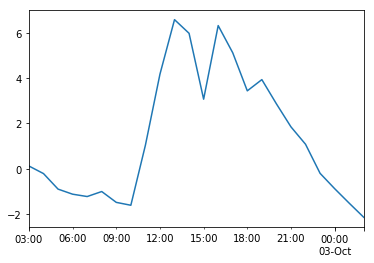

In [20]:
new_data.plot();

Indexes are also used by pandas to merge the data together. We are now putting our new (shifted) data into the dataframe as a new column:

In [21]:
df['NEW_TEMP'] = new_data

**E: print and plot the new dataframe. What did pandas to the data? Does it make sense? What would you have expected?**

In [22]:
# your answer here

### Operations on dataframes

Mathematical operations are also possible on DataFrames. For example, see the result of:

In [23]:
df - df

,TEMP_2M,NEW_TEMP
2010-10-02 00:00:00,0.0,NaN
2010-10-02 01:00:00,0.0,NaN
2010-10-02 02:00:00,0.0,NaN
2010-10-02 03:00:00,0.0,0.0
2010-10-02 04:00:00,0.0,0.0
2010-10-02 05:00:00,0.0,0.0
2010-10-02 06:00:00,0.0,0.0
...,...,...
2010-10-02 17:00:00,0.0,0.0
2010-10-02 18:00:00,0.0,0.0


This operation of course is not very useful, but you see the point. More interesting however is following:

In [24]:
df.mean()

TEMP_2M    -1.614833
NEW_TEMP    1.801571
dtype: float64

Ok, so it is easy to compute the average over columns. But see what happens when I do:

In [25]:
dfa = df - df.mean()

**E: plot the dfa variable. What did we just do? How do you think that pandas knows how to do this?**

In [26]:
# Your answer here

### Selecting data

As we have seen last week, the index decides upon how to locate data in the dataframe:

In [27]:
df_sel = df.loc['2010-10-02 08:00:00':'2010-10-02 14:00:00']
df_sel

,TEMP_2M,NEW_TEMP
2010-10-02 08:00:00,-1.964,-1.019
2010-10-02 09:00:00,1.189,-1.500
2010-10-02 10:00:00,3.608,-1.628
2010-10-02 11:00:00,3.001,1.036
2010-10-02 12:00:00,0.079,4.189
2010-10-02 13:00:00,3.344,6.608
2010-10-02 14:00:00,2.137,6.001


But it also possible to select data based on a condition. For example, I would like to select all data where `TEMP_2M` is higher than 2°:

In [28]:
df_sel.loc[df_sel['TEMP_2M'] > 2]

,TEMP_2M,NEW_TEMP
2010-10-02 10:00:00,3.608,-1.628
2010-10-02 11:00:00,3.001,1.036
2010-10-02 13:00:00,3.344,6.608
2010-10-02 14:00:00,2.137,6.001


We can also select data based on other conditions. For example:

In [29]:
df_sel.loc[df_sel.index.hour == 10]

,TEMP_2M,NEW_TEMP
2010-10-02 10:00:00,3.608,-1.628


Or taking all hours before and including 11:

In [30]:
df_sel.loc[df_sel.index.hour <= 11]

,TEMP_2M,NEW_TEMP
2010-10-02 08:00:00,-1.964,-1.019
2010-10-02 09:00:00,1.189,-1.500
2010-10-02 10:00:00,3.608,-1.628
2010-10-02 11:00:00,3.001,1.036


**E: to understand what is going on, print the result of `df_sel.index.hour <= 11`.**

In [31]:
# your answer here

### Resampling, grouping

For the next examples, we are going to need our original data back again:

In [32]:
df = pd.read_csv('data_Zhadang_Ex1.csv', index_col=0, parse_dates=True)

We already learned last week that we can compute monthly averages very easily using the `resample` function:

In [33]:
monthly_mean_ts = df.resample('MS').mean()

`resample` is "time aware", meaning that it understand the time and makes groups of the months. What you make with these groups is up to you (here we used `.mean()`, but last week we also used `.max()` for example).

Pandas provides an even more general way to make "groups". This is the `groupby` function. We are going to use it:

In [34]:
monthly_mean_groups = df.groupby(df.index.month).mean()

**E: Print and plot the variables `monthly_mean_ts` and `monthly_mean_groups`. What are the differences between the two? What is the same? Which different usage will both of them have?**

In [35]:
# your answer here

### Renaming columns

Let's start by creating a useful dataframe first:

In [36]:
daily_mean = df.resample('D').mean()
daily_mean['TEMP_MAX'] = df.resample('D').max()
daily_mean['TEMP_MIN'] = df.resample('D').min()

I can list all the available columns easily, since `columns` is a dataframe attribute:

In [37]:
daily_mean.columns

Index(['TEMP_2M', 'TEMP_MAX', 'TEMP_MIN'], dtype='object')

One of the possible ways to rename columns of a dataframe is simply to reassign this attribute:

In [38]:
daily_mean.columns = ['T_Mean', 'T_Max', 'T_Min']

## More about plotting

We have now seen that making a plot from a dataframe is a very easy task. Here we are going to show some ways to make other meaningful plots.

### Matplotlib

### Figure size

You can define the size of the figure with the following keyword:

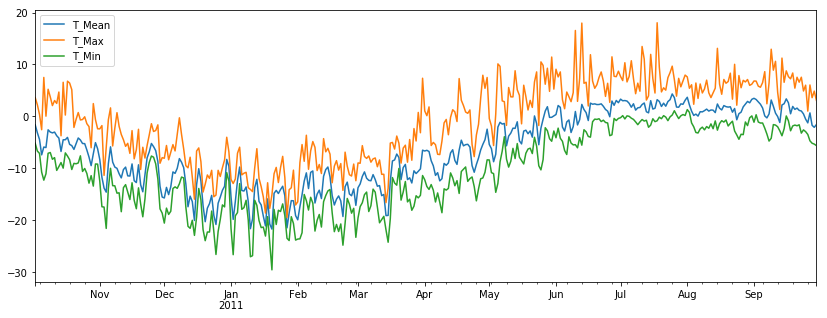

In [40]:
daily_mean.plot(figsize=(14, 5));

### Matplotlib machinery

Matplotlib is the actual "machine" doing the plots. We don't see it, because `pandas` is actually calling `matplotlib` internally. But pandas' plots are still "customizable", as we are going to see.

### Add units and title to the axes

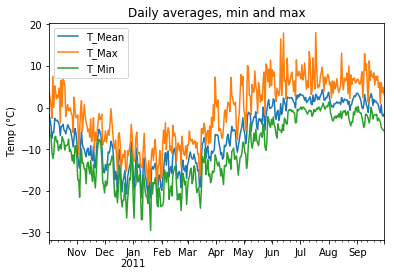

In [43]:
ax = daily_mean.plot()
ax.set_ylabel('Temp (°C)');
ax.set_title('Daily averages, min and max');

You can use latex formatting too!

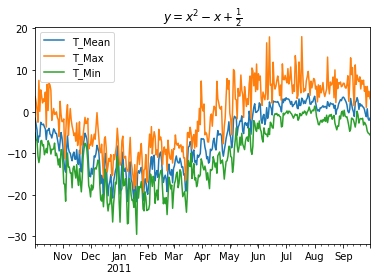

In [44]:
ax = daily_mean.plot()
ax.set_title('$y = x^2 - x + \\frac{1}{2}$');

### Multiple plots 

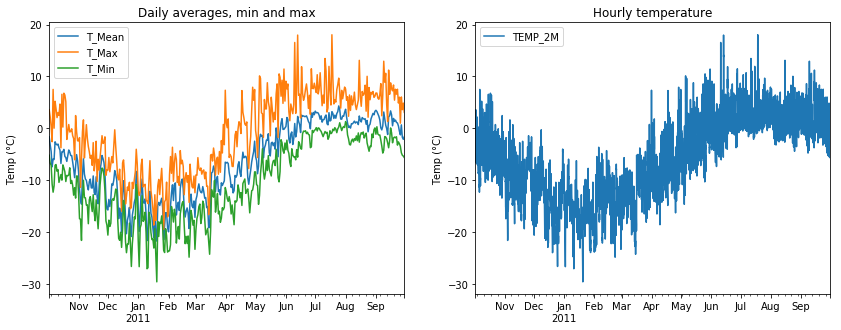

In [45]:
# Make one figure, two axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
# plot the first dataframe in the ax1
daily_mean.plot(ax=ax1);
# plot the second dataframe in the ax2
df.plot(ax=ax2);
# Rename the axes
ax1.set_ylabel('Temp (°C)');
ax2.set_ylabel('Temp (°C)');
ax1.set_xlabel('');
ax2.set_xlabel('');
# Add titles
ax1.set_title('Daily averages, min and max');
ax2.set_title('Hourly temperature');

### Interactive plots

At the begining of this notebook we used the setting ``%matplotlib inline``, which tells matplotlib to display the plots in the notebook. It is also possible to display them using a more interactive window:

<IPython.core.display.Javascript object>


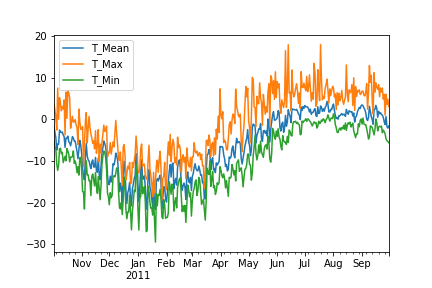

In [47]:
%matplotlib notebook
daily_mean.plot();

This feature is relatively new, and used to be a bit buggy. Now it seems to work better, but if you encounter problems just go back to the ``inline`` option:

In [48]:
%matplotlib inline

### Make the plots more pretty (a matter of taste)

It is a matter of taste, but people say that that matplotlib has bad figure style defaults (this changed recently with the update to Matplotlib V2, which has **much** nicer colors and prettier defaults than V1).

Still, some people decided to make their own custom styles, for example the people who devellopped the [seaborn](https://stanford.edu/~mwaskom/software/seaborn/) library. Seaborn just needs to be imported, after which the plots look quite different:

In [49]:
import seaborn as sns

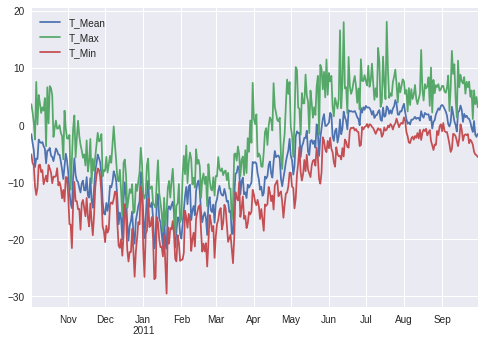

In [50]:
daily_mean.plot();

If you want, you can control the [figure aesthetics](https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html) using other set-ups:

In [51]:
# Setting new defaults. See the link above for more options
sns.set_style('ticks')
sns.set_context('talk')

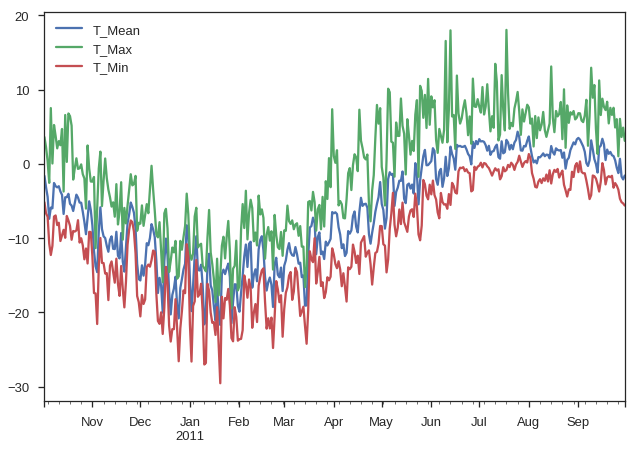

In [52]:
daily_mean.plot();

## Further kind of plots 

Timeseries are by far not the only way to represent data. Here we show three other ways to represent the data.

**Do you know what each of these plots is used for? Do you see them often?**

### Scatterplots

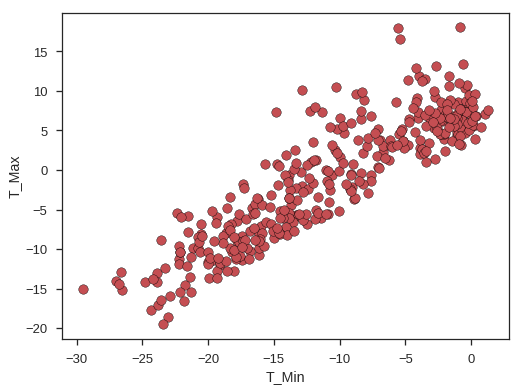

In [54]:
daily_mean.plot(kind='scatter', x='T_Min', y='T_Max',
                s=90, c='C2', edgecolor='k', figsize=(8, 6));

### Histogram plots

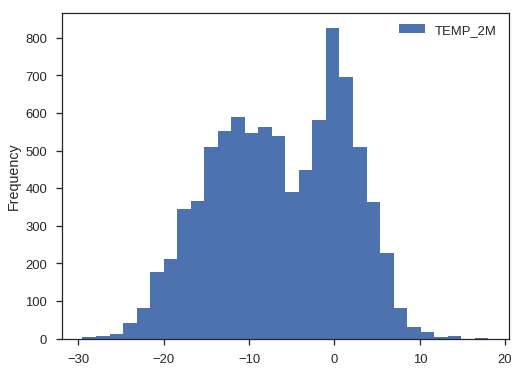

In [55]:
df.plot(kind='hist', bins=30, figsize=(8, 6));

### Boxplots

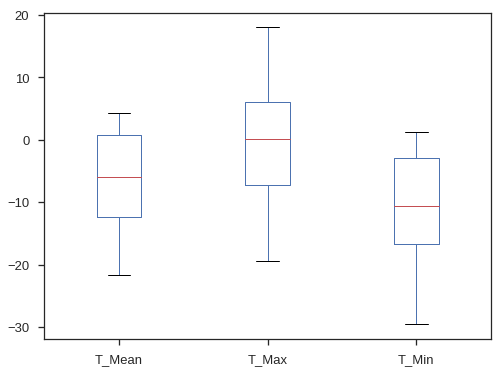

In [56]:
daily_mean.plot(kind='box', figsize=(8, 6));

### More exotic things

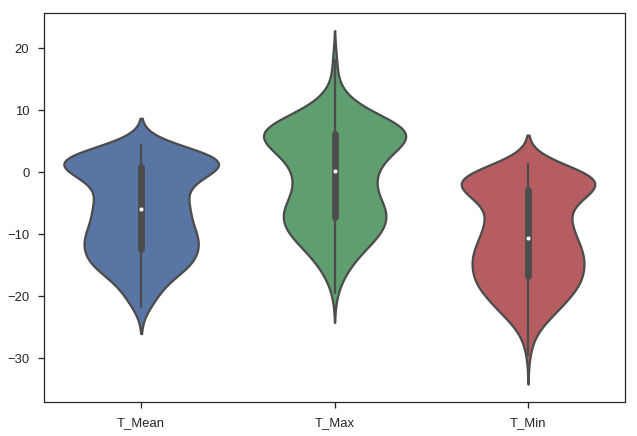

In [57]:
sns.violinplot(data=daily_mean);

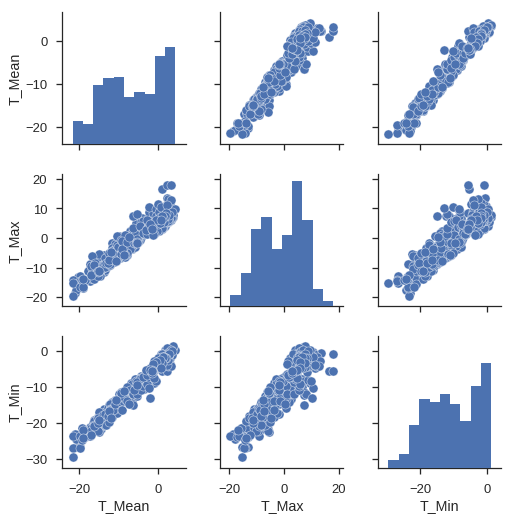

In [58]:
sns.pairplot(daily_mean);

# What next?

We had a dense introduction to many features of pandas. The best way to get used to them is... to use them! Let's apply these new tools in the next exercise (`03_DataGame.ipynb`): 

      $ cp /scratch/c707/c7071047/teaching/ss_2017/03_DataGame.ipynb ~/exercises/03_DataGame.ipynb
      
(Or, as usual, on OLAT...)